<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Exercise%20Solutions/%F0%9F%9B%A0%2002_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural network classification with TensorFlow Exercise Solutions

## Questionnaire 

1. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.

2. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

3. Recreate [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)'s [softmax activation](https://en.wikipedia.org/wiki/Softmax_function) function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

5. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [1]:
# Importing the stuffs we need 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### 1. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.


In [2]:
# Importing the make moons from sklearn datasets 
from sklearn.datasets import make_moons

# Make 3k samples 
n_samples = 1000

# Create circles 
X , y = make_moons(n_samples = n_samples ,
                   random_state = 42)

# Checking the shape of X and y 
print(X.shape , y.shape)

# Packing them into a dataframe 
make_moons_df = pd.DataFrame({'col_1': X[: , 0] , 
                              'col_2': X[: , 1], 
                              'label': y})
make_moons_df.head()

(1000, 2) (1000,)


,col_1,col_2,label
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


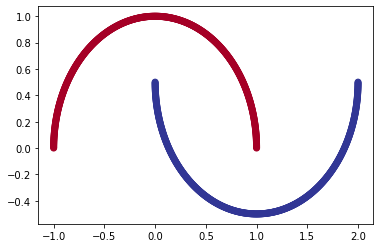

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [4]:
# Splitting the dataset into train and test 
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , 
                                                       test_size = 0.2 , 
                                                       random_state = 42)

# Checking the shape after splitting 
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [5]:
# Building a simple model 
from tensorflow.keras import layers 

model = tf.keras.Sequential([
    layers.Dense(32 , activation= 'relu'), 
    layers.Dense(10 , activation= 'relu'),
    #layers.Flatten(),
    layers.Dense(1 , activation= 'sigmoid')
])

# Compiling the model 
model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['accuracy'])

# Fitting the model 
model.fit(X_train , y_train, 
          epochs = 15)

Epoch 1/15
25/25 [==============================] - 1s 2ms/step - loss: 0.6418 - accuracy: 0.7700
Epoch 2/15
25/25 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.8075
Epoch 3/15
25/25 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.8200
Epoch 4/15
25/25 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8338
Epoch 5/15
25/25 [==============================] - 0s 1ms/step - loss: 0.3798 - accuracy: 0.8462
Epoch 6/15
25/25 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.8537
Epoch 7/15
25/25 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8600
Epoch 8/15
25/25 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.8662
Epoch 9/15
25/25 [==============================] - 0s 1ms/step - loss: 0.2737 - accuracy: 0.8712
Epoch 10/15
25/25 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.8750
Epoch 11/15
25/25 [

In [6]:
# Creating a function to visualize how our model is performing...
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.

  Arguments: 
    model --> the trained model 
    X --> the feature data (numpy array)
    y --> the truth labels 

  Returns:
    A visualization of how our model is performing (fitting with our data)
    
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


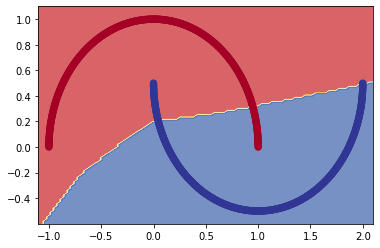

In [7]:
plot_decision_boundary(model , X , y)

Better results can be achieved if it's trained for more epoch. 

### 2. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

In [8]:
# Getting the MNIST data from the keras dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Splitting into train and test 
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

# Checking the shapes of the splits 
train_images.shape , train_labels.shape , test_images.shape , test_labels.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### 3. Recreate [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)'s [softmax activation](https://en.wikipedia.org/wiki/Softmax_function) function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

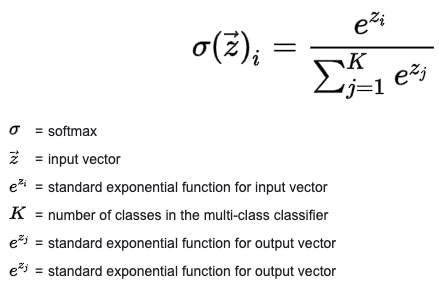

In [9]:
# Implementing a softmax function 
def softmax(x):
  '''
  Argument:
  x --> Accepts a tensor of any shape

  Returns: 
  --> softmax activations of the input tensor
  '''
  x = tf.cast(x , dtype = tf.float32) # to tackle the data type error of int32 / int64

  # Below is the forumale
  e_x = tf.math.exp(x - tf.math.reduce_max(x))
  return e_x / tf.math.reduce_sum(e_x , axis = 0)

In [10]:
# Creating sample tensor 
tensor = tf.constant([[1, 2, 3, 6],
                     [2, 4, 5, 6],
                     [3, 8, 7, 6]] )
tensor

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 3, 6],
       [2, 4, 5, 6],
       [3, 8, 7, 6]], dtype=int32)>

In [11]:
# Applying our softmax function 
softmax(tensor)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.09003057, 0.00242826, 0.01587624, 0.3333333 ],
       [0.24472849, 0.01794253, 0.11731043, 0.3333333 ],
       [0.66524094, 0.9796292 , 0.8668133 , 0.3333333 ]], dtype=float32)>

### 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.


In [12]:
# Getting the MNIST data from the keras dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Splitting into train and test 
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

# Number of classes and class names
num_classes = 10     # 10 labels/classes

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Checking the shapes of the splits 
train_images.shape , train_labels.shape , test_images.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [13]:
# Building a simple model for the fashion mnist 
simple_model = tf.keras.Sequential([
  layers.Flatten(input_shape = (28 , 28)), 
  layers.Dense(64 , activation= 'relu'), 
  layers.Dense(32 , activation = 'relu'),
  layers.Dense(10 , activation='softmax')
])

# Compiling the model 
simple_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # because our labels isnt one hot encoded
                     optimizer = tf.keras.optimizers.Adam() , 
                     metrics = ['accuracy'])

# Fitting the model 
history = simple_model.fit(train_images , train_labels , 
                           epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1116 - accuracy: 0.6450
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7286 - accuracy: 0.7228
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5617 - accuracy: 0.7955
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5149 - accuracy: 0.8159
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4847 - accuracy: 0.8273
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4583 - accuracy: 0.8349
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4401 - accuracy: 0.8429
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4204 - accuracy: 0.8500
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4093 - accuracy: 0.8539
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.398

I have just trained for 20 epochs, by adding a extra dense layer (or) training for more epochs will able to give us great results. 

In [14]:
# Function for the confusion matrix 
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [15]:
# Making predictions with our model 
pred_probs = simple_model.predict(test_images)

# Converting our pred probs to predictions 
preds = pred_probs.argmax(axis = 1)

# Viewing the first 10 preds 
preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

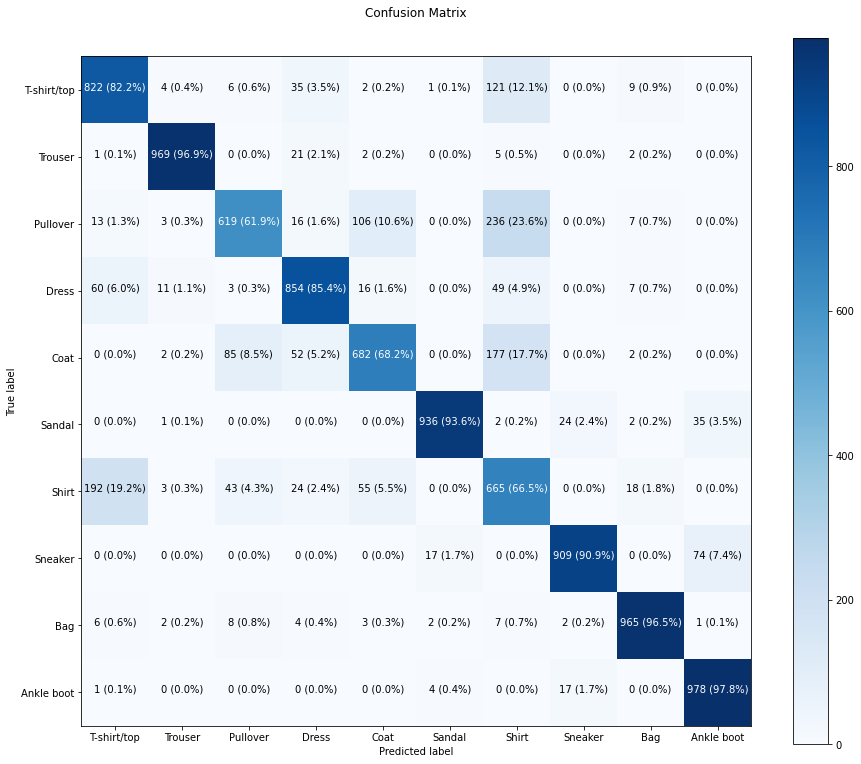

In [16]:
# Plotting the confusion matrix 
make_confusion_matrix(y_true = test_labels , 
                      y_pred = preds , 
                      classes = class_names , 
                      figsize = (15 , 13), 
                      text_size = 10)

In [20]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 5. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [35]:
# Making predictions 
preds = simple_model.predict(test_images)

In [33]:
# Below function is from TensorFlow Tutorials (https://www.tensorflow.org/tutorials/keras/classification#verify_predictions)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



def plot_prediction_images():
  num_rows = 5 
  num_cols = 3
  num_images = num_rows * num_cols 
  plt.figure(figsize = (2*2*num_cols , 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols , 2*i+1)
    plot_image(i , preds[i], test_labels , test_images)
    plt.subplot(num_rows , 2*num_cols , 2*i+2)
    plot_value_array(i , preds[i] ,  test_labels)
  plt.tight_layout()
  plt.show



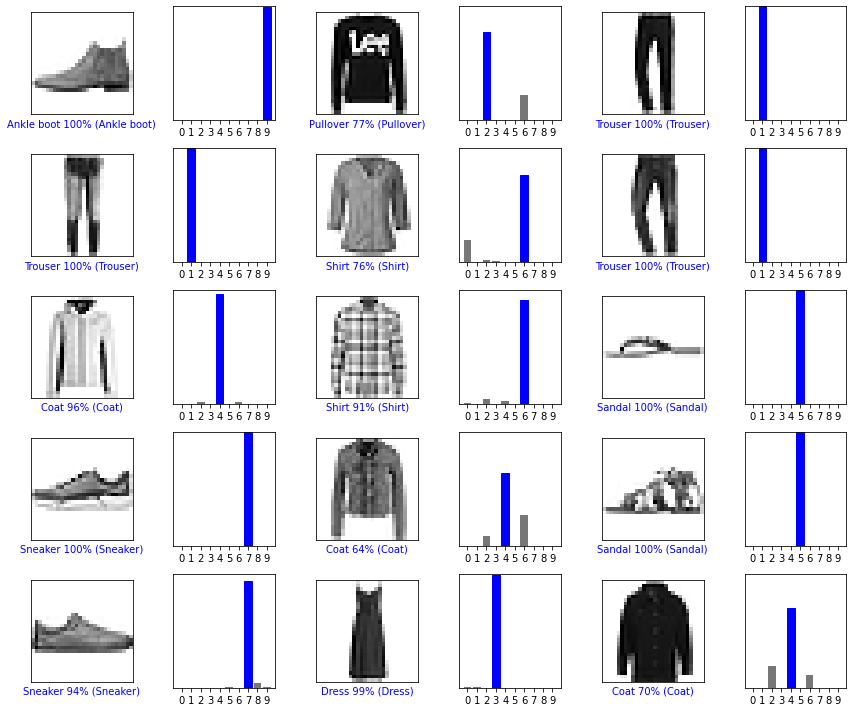

In [34]:
# Using our function
plot_prediction_images()

Have a great day! 